# Librerias

In [1]:
#Support Vector Machine - Kernel Lineal
#Iniciar tiempo
import time
start_time = time.time()
#Liberia Princiaples
import numpy as np                # Array y Matrix
import matplotlib.pyplot as plt   # Para mostar imagenes                     
#Liberia Auxiliares
import os
import sys
import gzip
# Libreria Sklearn
from sklearn import svm
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.externals import joblib

# Funcion  MNIST

In [2]:
def load_dataset():    
    if sys.version_info[0] == 2:
        from urllib import urlretrieve
    else:
        from urllib.request import urlretrieve
    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)
    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)        
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)        
        data = data.reshape(-1, 1, 28, 28)
        return data / np.float32(1)
    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)        
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)        
        return data
    # Conjuento de Entranamiento (Imagnes , Etiqueta)
    X_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    # Conjuento de prueba (Imagnes , Etiqueta)
    X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')
    #
    X_train = X_train.reshape(X_train.shape[0], 28 * 28)
    X_test = X_test.reshape(X_test.shape[0], 28 * 28)  
    return X_train, y_train, X_test, y_test

# Extraccion de DB MNIST

In [3]:
X_train, y_train, X_test, y_test = load_dataset()

In [6]:
set1 = str(int(len(X_train)))
set2 = str(int(len(X_test)))
print("Entranamiento   = %s"%set1)
print("Prueba          = %s"%set2)

Entranamiento   = 60000
Prueba          = 10000


# Usar solo 10,000 de 60,000

In [8]:
max_examples = 10000

In [9]:
features = np.array(X_train[:max_examples], 'int16') 
labels = np.array(y_train[:max_examples], 'int')

test_features = np.array(X_test, 'int16') 
test_labels = np.array(y_test, 'int')

# Funcion HOG

In [10]:
list_hog_fd = []
for feature in features:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')
a = hog_features

list_hog_fd2 = []
for test_feature in test_features:
    fd2 = hog(test_feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    list_hog_fd2.append(fd2)
hog_test_features = np.array(list_hog_fd2, 'float64')
b = hog_test_features

# Iniciar el SVM

In [11]:
clf =  svm.SVC(kernel = 'linear')            #Iniciar SVM linear default
clf.fit(hog_features,labels)                 #Entrenamiento SVM con 10,000 imagenes
y_pred_svm = clf.predict(hog_test_features)  #Test SVM 

# Validacion y Prueba

###  Prueba 1 : Precisión

In [12]:
acc_clf = accuracy_score(test_labels, y_pred_svm)      
print "Precision SVM Lineal: ",acc_clf

Precision SVM Lineal:  0.8958


###  Prueba 2 :Matriz de Clasificacion

In [13]:

expected = test_labels
predicted = y_pred_svm
#print("Classification report for classifier %s:\n%s\n"% (clf, metrics.classification_report(expected, predicted)))
print("\n Matriz Clasificacion \n%s\n"% ( metrics.classification_report(expected, predicted)))


 Matriz Clasificacion 
             precision    recall  f1-score   support

          0       0.91      0.97      0.94       980
          1       0.96      0.96      0.96      1135
          2       0.85      0.91      0.88      1032
          3       0.86      0.86      0.86      1010
          4       0.89      0.87      0.88       982
          5       0.94      0.90      0.92       892
          6       0.91      0.92      0.91       958
          7       0.92      0.88      0.90      1028
          8       0.86      0.87      0.86       974
          9       0.87      0.81      0.84      1009

avg / total       0.90      0.90      0.90     10000




###  Prueba 3 : Matriz de confusion

In [14]:

print("Matriz de Confusion:\n%s" % metrics.confusion_matrix(expected, predicted))

Matriz de Confusion:
[[ 949    5    3    0    4    1    3    2    2   11]
 [   4 1089    5    1   12    0   12    2    7    3]
 [   6    3  939   46   18    0    1    9    6    4]
 [  10    0   74  866    3   11    0   15    9   22]
 [  18   22   10    6  851    1   33    1   18   22]
 [   1    0    1   29    2  806    4    1   34   14]
 [   7    3    0    1   24    8  882    0   31    2]
 [   5    7   51   13    3    1    0  908   12   28]
 [  14    2   12    8   13    6   34   19  846   20]
 [  29    9    4   35   22   28    3   35   22  822]]


###  Prueba 4 : Validacion cruzada - K-fold


### Guardar SVM

In [18]:
joblib.dump(clf, "clf_lineal.pkl", compress=3)

['clf_lineal.pkl']

# Visualizar Base de datos 

In [33]:
numero=999

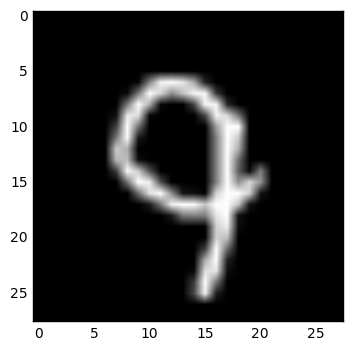

In [36]:
pd = test_features[numero]
pd2 = test_labels[numero]
plt.imshow(pd.reshape((28,28)),'gray')
plt.show()

In [35]:
fd1= hog(pd.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
nbr = clf.predict(np.array([fd1], 'float64'))
snum=str(int(nbr))
print("la prediccion es :%s"%snum +' conside con la etiqueta ',pd2)

('la prediccion es :9 conside con la etiqueta ', 9)
